In [1]:
import scipy.io
import utils
import visualize as vis
import numpy as np
import TWIST

Load data

In [28]:
data_path = '../data/3DS_m3_np2_df0.5_32x32x5.mat'

m = 3 # no of patterns
nump = 2 # no of detected planes
df = 0.5 # downsampling factor
nx = 32 # width of a plane (dy = 1/3 um)
ny = 32 # height of a plane (dx = 1/3 um)
nz = 5 # number of planes (dz = 2 um)

data = scipy.io.loadmat(data_path)

FM = data['A']
X = data['X_original'].T
y_clean = data['Y'].T
y_noisy = data['Yn'].T

Visualize measurement matrix A

In [29]:
# vis.visualize_A(FM, nx, ny, nz, nump, m, df, figsize=(12, 12))

Visualize object X

In [30]:
# vis.visualize_X(X, nx, ny, nz, figsize=(15, 15), planes_to_plot=range(nz))

Visualize measurement y

In [31]:
# clean measurements
# vis.visualize_y(y_clean, nx, ny, df, m, nump, figsize=(15, 15))

In [32]:
# noisy measurements
# vis.visualize_y(y_noisy, nx, ny, df, m, nump, figsize=(15, 8))

Run twist

In [33]:
y = y_noisy # observed data

absAty = np.abs(utils.AT(y, FM, nx, ny, nz))
tau = 1e-7*np.max(absAty) # Regularization parameter
lam1 = 1e-4 # Regularization parameter
tolA = 1e-3 # Stopping threshold

x_twist, dummy, obj_twist, times_twist, dummy, mse_twist, dummy = TWIST.TwIST(y, FM, 0.01, nx, ny, nz,
                                                                  LAMBDA=lam1, TRUE_X=X, MONOTONE=1, INITIALIZATION=0,
                                                                  STOPCRITERION=1, TOLERANCEA=tolA, VERBOSE=1)


Initial objective = 9333152.0, nonzeros = 0
Incrementing S = 2
Incrementing S = 4
Incrementing S = 8
Incrementing S = 16
Incrementing S = 32
Incrementing S = 64
Incrementing S = 128
Incrementing S = 256
Incrementing S = 512
Incrementing S = 1024
Incrementing S = 2048
Incrementing S = 4096
Incrementing S = 8192
Incrementing S = 16384
Incrementing S = 32768
Incrementing S = 65536
Incrementing S = 131072
Incrementing S = 262144
Iteration = 2, objective = 4510984.3836107645, nz = 5120, criterion = 516.6708542183001
Incrementing S = 524288
Iteration = 3, objective = 1739063.258402634, nz = 5120, criterion = 614.4825362905333
Iteration = 4, objective = 1417592.1600360954, nz = 5120, criterion = 184.85302177093686
Iteration = 5, objective = 1230362.3790134424, nz = 5120, criterion = 132.07591456902927
Iteration = 6, objective = 1081509.3576127067, nz = 5120, criterion = 120.98307290579908
Iteration = 7, objective = 956280.9355264637, nz = 5120, criterion = 115.79041938450605
Iteration = 8, o

Visualize results

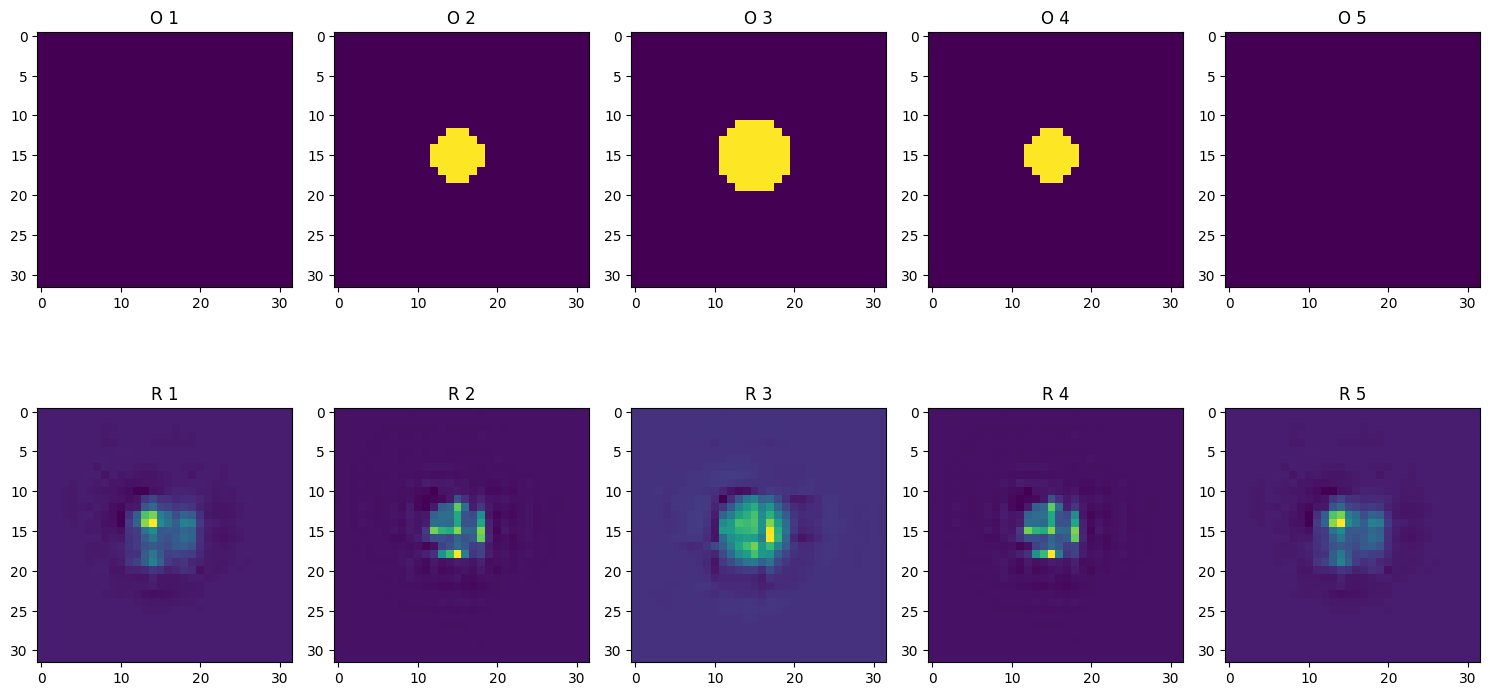

In [34]:
vis.comparison_twist(X, x_twist, nx, ny, nz, figsize=(15, 8), planes_to_plot=range(0,nz,1))

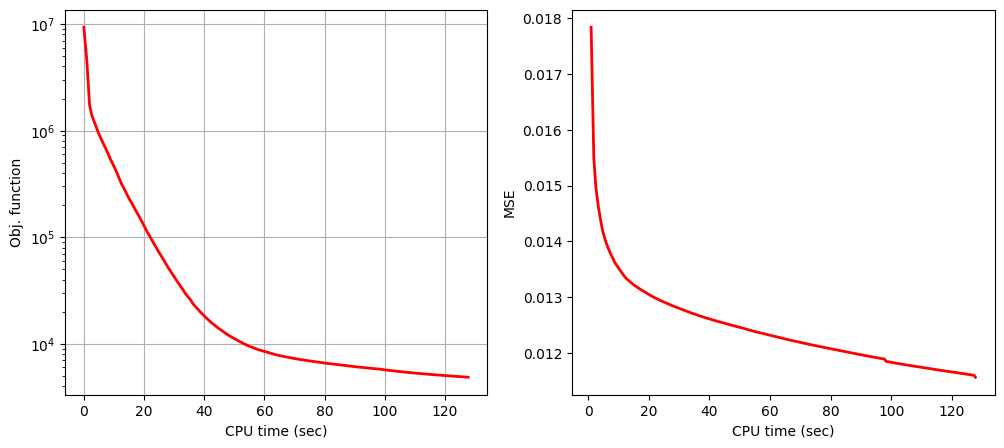

TwIST CPU time: 127.75
MSE Loss: 1.1561e-02


In [35]:
vis.obj_mse_twist(obj_twist, times_twist, mse_twist, figsize=(12, 5))